In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#root_path = '/content/gdrive/My Drive/Colab Notebooks/MyModel'
#import sys
#sys.path.append(root_path)

In [1]:
import torch
import torchvision
from torchvision import models
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.utils.data
import os
import torch.nn.functional as F

#modules
from cifar10_models import resnet
import data_loader
import visualize
import train_model
import FGSM
import augment

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Files already downloaded and verified
Files already downloaded and verified


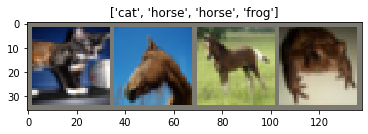

In [2]:
#LOAD DATA
batch_size=4
trainloader, testloader, attributes=data_loader.load_cifar10(batch_size)
N_test=attributes["N_test"]
N_train=attributes["N_train"]
classes=attributes["class_names"]

# VISUALIZE
inputs, class_data = next(iter(trainloader))
visualize.imshow(inputs, title=[classes[i] for i in class_data])

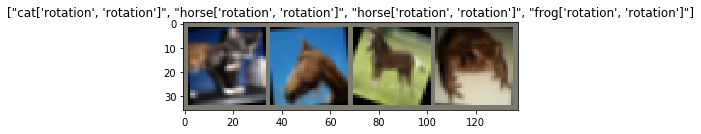

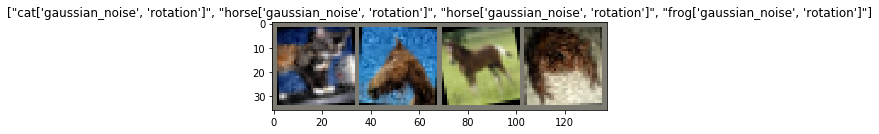

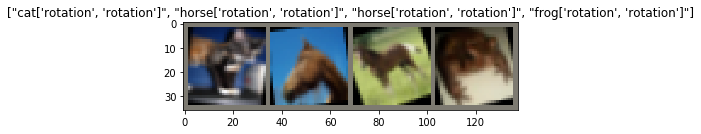

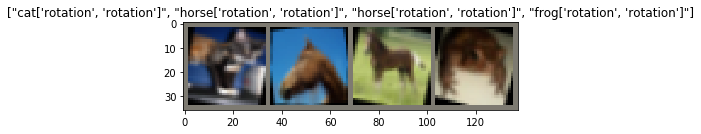

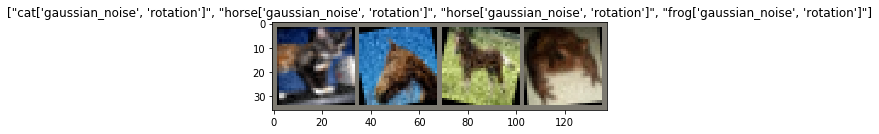

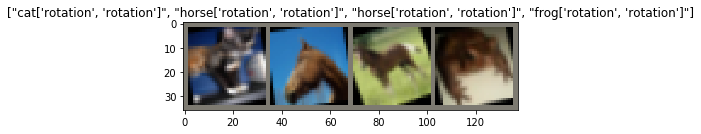

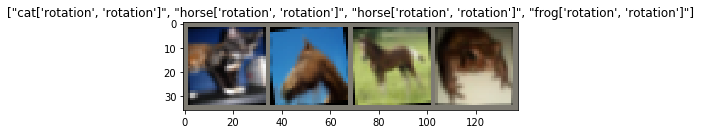

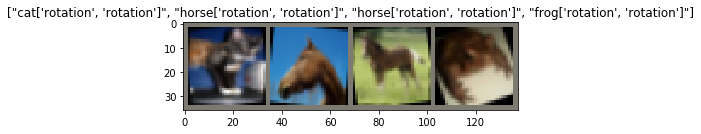

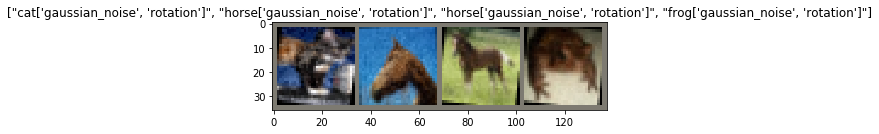

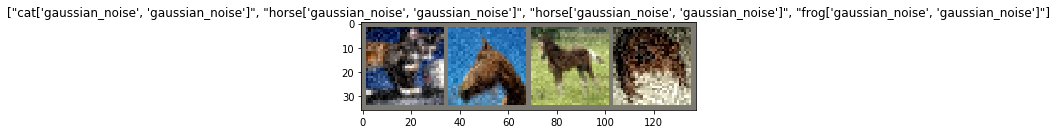

In [3]:
# TEST AUGMENTATION OF BATCH
aug_batches, aug_seqs, aug_seqs_names = augment.compute_augmentations(inputs, n = 10, depth = 2)
for i, _ in enumerate(aug_seqs_names):
    visualize.imshow(aug_batches[i], title=[classes[j]+str(aug_seqs_names[i]) for j in class_data])
    plt.pause(0.001)
    
# pause a bit so that plots are updated

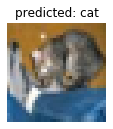

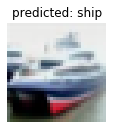

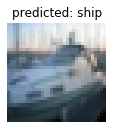

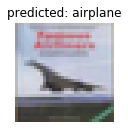

In [4]:
#load the pretrained resnet 18
model = resnet.resnet18(pretrained=True).to(device)
#train if necessary
#model_ft = train_model.train(model, trainloader, testloader,num_epochs=2, batch_size=batch_size)

path="cifar10_models/state_dicts/resnet18.pt"
model.load_state_dict(torch.load(path,map_location=torch.device('cpu')));
model.eval();
visualize.visualize_model(model, testloader, classes, num_images=4)

## FGSM

In [5]:
final_acc_b_adv, adv_examples_b_adv = FGSM.test(model, test_loader=testloader, epsilon=0.3)

Epsilon: 0.3	Test Accuracy = 3007 / 10000 = 0.3007


In [6]:
final_acc_b, adv_examples_b = FGSM.test(model, test_loader=testloader, epsilon=0)

Epsilon: 0	Test Accuracy = 9348 / 10000 = 0.9348


In [5]:
final_acc_aug_adv, adv_examples_aug_adv = FGSM.test_augmented(model, testloader, epsilon=0.3, augmentations = "g", n = 5)

Epsilon: 0.3	Test Accuracy = 2428 / 10000 = 0.2428


In [6]:
final_acc_aug, adv_examples_aug = FGSM.test_augmented(model, testloader, epsilon=0)

Epsilon: 0	Test Accuracy = 7809 / 10000 = 0.7809


In [7]:
final_acc_aug, adv_examples_aug = FGSM.test_augmented(model, testloader, epsilon=0.3, augmentations = "r", n = 5)

Epsilon: 0.3	Test Accuracy = 3846 / 10000 = 0.3846


In [10]:
final_acc_aug, adv_examples_aug = FGSM.test_augmented(model, testloader, epsilon=0.3, augmentations = "all", n = 5)

Epsilon: 0.3	Test Accuracy = 3238 / 10000 = 0.3238


In [9]:
final_acc_aug, adv_examples_aug = FGSM.test_augmented(model, testloader, epsilon=0.3, augmentations = "all", n = 11)

Epsilon: 0.3	Test Accuracy = 3283 / 10000 = 0.3283


In [11]:
final_acc_aug, adv_examples_aug = FGSM.test_augmented(model, testloader, epsilon=0, augmentations = "r", n = 5)

Epsilon: 0	Test Accuracy = 9047 / 10000 = 0.9047
